**Demonstration of Anomaly Detection (Credit Card  Dataset) -- EDA -- Local Outlier Factor (LOF) & Isolation Forest Algorithm**
-------------------------------------------------------------------------------------------------------------------------- -------------------------------------------------------------------------------------------------------------------------- -------------------------------------------------------------------------------------------------------------------------- ---------------------------------------------------

**Structure**

   The scope of this work is to demonstrate the use of machine learning models for the detection of anomalies (fraudulent transactions) based on the records/samples of a multi-dimensional 'Credit Card' dataset. The dataset comprises a 'Time' feature (transaction time interval in sec.,where 't'='t_current'- 't_first=0'), 28 'credit card user' features (V1-V28, part of PCA dimensionality reduction to protect the user personal information), the transaction 'Amount' feature and the 'Class' feature, that is of binary type, which represents the type of transaction : a)nonfraudulent(inliers) and b) fraudulent(outliers).

   Initially,an exploratory data analysis is provided in order to extract useful information from  selected credit card transaction dataset columns (e.g.'Time','Amount','Class' and 'user' features) with the help of data visualization techniques (i.e. pie & bar charts, count/ distribution/ box/  scatter plots). The scope of the EDA is to uncover meaningful insights related to fraudulent credit card transactions such as a) the total number of records  per 'Class' ('Nonfraudulent'/Fraudulent transactions--> balanced/unbalanced dataset), b) the  'Amount' feature density estimation/distribution in terms of the outlier samples (i.e.maximum, minimum ,median transaction amount), c) the 'Time' feature distribution and related statistics when grouped at different time intervals, d) Correlation of all dataset features with the 'Amount' feature and e) The samples distribution (spread of data) of the strongest/weakest correlated dataset features with respect to  fraudulent transaction amount.
   
   In the second part of this demonstration, Sampling(30%) is applied to the 'credit card' dataset so as to reduce the time that is required to perform the upcoming computational processes due to its original large size. In order to determine whether a transaction is fraudulent or not, two unsupervised anonaly detection machine learning algorithms are employed: a) the Local Outlier Factor (Based on the nearest neighbor technique) and b) the Isolation Forest (Based on the principles of ensemble methods that use combinations of Decision Trees/Random Forest algorithm). The sampled dataset is split into training samples and labels, where the training samples are fitted to each machine learning model to compute whether each sample is considered an inlier (nonfradulent transaction) or outlier(fraudulent transaction) and at the end the predictions are compared with the actual labels so as to evaluate the ML models performance (score metrics: classification_report-confusion matrix ). 
   
   The Dataset (.csv file format) for this project has been obtained from Kaggle:

"Credit Card Fraud Detection" -- File: "creditcard.csv" -- Source: https://www.kaggle.com/shayannaveed/credit-card-fraud-detection


In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Importing the dataset
from google.colab import files
files.upload()

Saving creditcard.csv to creditcard.csv


In [154]:
# Reading the 'csv' file with pandas
data=pd.read_csv('creditcard.csv')

In [155]:
# Dataset Preview
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [156]:
# Dataset consists of 'Time','Amount','Class' and 28 other features, all of numeric dtype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [157]:
# There is no presence of 'NaN' records
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [158]:
# 'Time'and 'Amount' features Statistics 
data[['Time','Amount']].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


In [159]:
# Count of 'Class' feature records (0: Nonfraudulent transactions,1: fraudulent transactions)
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

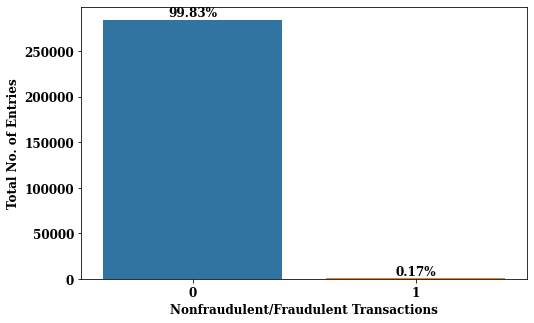

In [160]:
# As it can be observed, the credit card 'Class' feature is unbalanced with respect to its entries

plt.rcParams['font.size']=12

total_entries=data.shape[0]
plt.figure(figsize=(8,5))
count_trans=sns.countplot('Class',data=data)
plt.xlabel('Nonfraudulent/Fraudulent Transactions',fontweight='bold')
plt.ylabel('Total No. of Entries',fontweight='bold')
for p in count_trans.patches:
    count_trans.annotate('{:.2f}%'.format(100*p.get_height()/total_entries), (p.get_x() + p.get_width() / 2., p.get_height()), 
                               ha = 'center', va = 'center', xytext = (0, 7), textcoords = 'offset points')

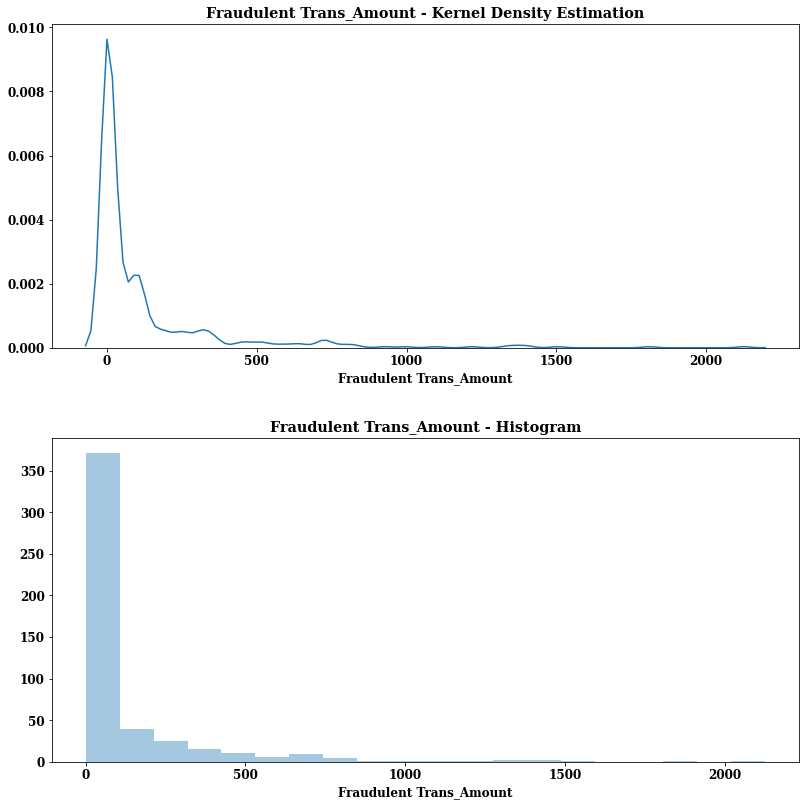

In [161]:
# Amount(Fraudulent Transactions) kernel density estimation and histogram plots

fig,axs=plt.subplots(2,1,figsize=(12,12))

sns.distplot(data['Amount'][data['Class']==1],hist=False,ax=axs[0])
axs[0].set_title('Fraudulent Trans_Amount - Kernel Density Estimation',fontweight='bold')
axs[0].set_xlabel('Fraudulent Trans_Amount',fontweight='bold')

sns.distplot(data['Amount'][data['Class']==1],kde=False,bins=20,ax=axs[1])
axs[1].set_title('Fraudulent Trans_Amount - Histogram',fontweight='bold')
axs[1].set_xlabel('Fraudulent Trans_Amount',fontweight='bold')

for ax in axs.flat:
    
    ax.figure.tight_layout(pad=3);

In [162]:
# Creating a new column to convert the of each transaction with respect to the first transaction from seconds to minutes
data['Time_min']=data['Time']/60
data['Time_min'].head()

0    0.000000
1    0.000000
2    0.016667
3    0.016667
4    0.033333
Name: Time_min, dtype: float64

In [163]:
# Creating a new column to convert the of each transaction with respect to the first transaction from seconds to hour
data['Time_hour']=data['Time']/3600
data['Time_hour'].head()

0    0.000000
1    0.000000
2    0.000278
3    0.000278
4    0.000556
Name: Time_hour, dtype: float64

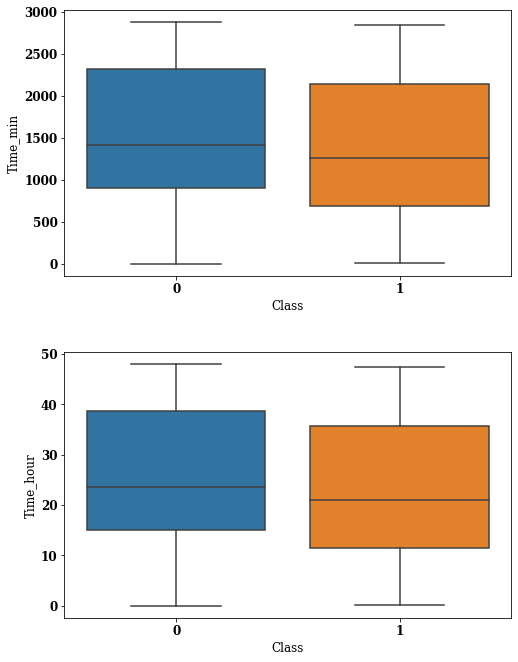

In [164]:
# Boxplots presenting the time (a)minutes, b)hour) statistics of nonfraudulent and fraudulent transactions

fig,axs=plt.subplots(2,1,figsize=(8,10))
sns.boxplot(x='Class',y='Time_min',data=data,ax=axs[0])
sns.boxplot(x='Class',y='Time_hour',data=data,ax=axs[1])


for ax in axs.flat:
    
    ax.figure.tight_layout(pad=3)



In [165]:
# Function to group the transactions into 8-hour intervals with respect to the time of the first transaction (t=0)
tper1=data['Time_hour'][(data['Time_hour']>=0)&(data['Time_hour']<=8)]
tper2=data['Time_hour'][(data['Time_hour']>8)&(data['Time_hour']<=16)]
tper3=data['Time_hour'][(data['Time_hour']>16)&(data['Time_hour']<=24)]
tper4=data['Time_hour'][(data['Time_hour']>24)&(data['Time_hour']<=32)]
tper5=data['Time_hour'][(data['Time_hour']>32)&(data['Time_hour']<=40)]
tper6=data['Time_hour'][(data['Time_hour']>40)&(data['Time_hour']<=48)]

def time_per(val):
 if val in tper1.values:
      ti_period = '0-8 Hours'
 elif val in tper2.values:
      ti_period = '8-16 Hours'
 elif val in tper3.values:
      ti_period = '16-24 Hours'
 elif val in tper4.values:
       ti_period = '24-32 Hours'
 elif val in tper5.values:
      ti_period = '32-40 Hours'
 elif val in tper6.values:
      ti_period = '40-48 Hours'
 return ti_period

In [166]:
# Creating a new dataset column by applying the' time_per' function on 'Time_hour' column
data['Time_Interval'] = data['Time_hour'].apply(time_per)

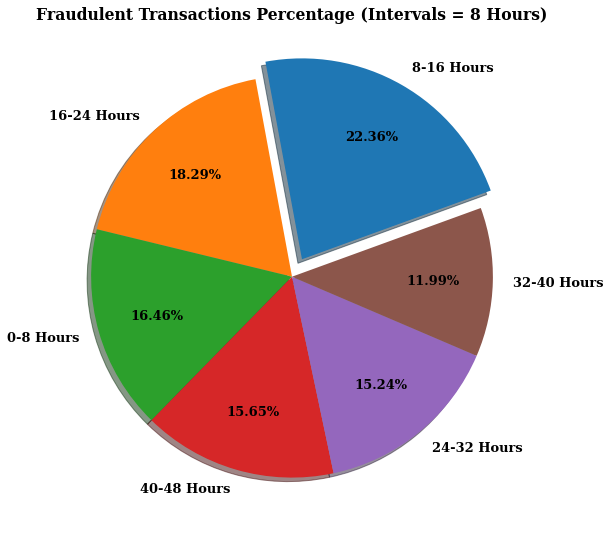

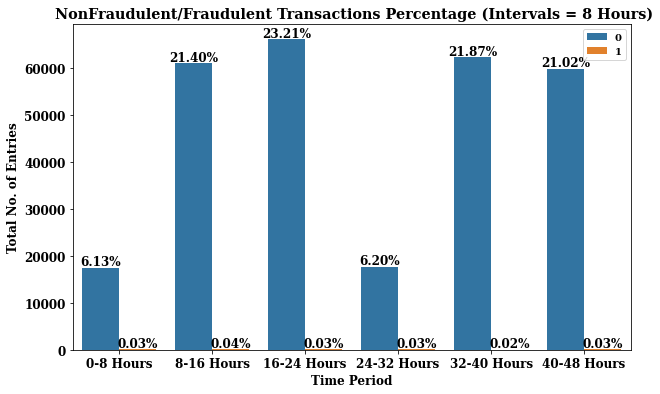

In [167]:
# Pie chart presenting the percentage of each 8-Hour Interval group with respect to the total number of fraudulent transactions
fig, ax = plt.subplots(1,figsize=(9,11))

plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.rcParams['font.family'] = 'Times New Roman, serif'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor']= 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['font.size']=13
labels =data['Time_Interval'][data['Class']==1].value_counts().index
count = data['Time_Interval'][data['Class']==1].value_counts().values
explode = (0.1,0,0,0,0,0)
ax.pie(count,explode=explode,labels=labels,pctdistance=0.7,
       autopct='%1.2f%%', labeldistance=1.1,shadow=True, startangle=20);
ax.set_title("Fraudulent Transactions Percentage (Intervals = 8 Hours)",fontweight='bold')
# Countplot presenting the percentage of each 3-Hour In-Out Temp subgroup with respect to the total No. of temperature entries
plt.figure(figsize=(10,6))
plt.rcParams['font.size']=12
total_entries=len(data)
count_entries=sns.countplot('Time_Interval',data=data,hue='Class',order=['0-8 Hours','8-16 Hours','16-24 Hours','24-32 Hours',
                                                                          '32-40 Hours','40-48 Hours'])
plt.xlabel('Time Period',fontweight='bold')
plt.ylabel('Total No. of Entries',fontweight='bold')
plt.title(' NonFraudulent/Fraudulent Transactions Percentage (Intervals = 8 Hours)',fontweight='bold')
plt.legend(loc='best',fontsize=10)
for p in count_entries.patches:
    count_entries.annotate('{:.2f}%'.format(100*p.get_height()/total_entries), (p.get_x() + p.get_width() / 2., p.get_height()), 
                               ha = 'center', va = 'center', xytext = (0, 6), textcoords = 'offset points')

In [168]:
# Creating a new pd dataframe of Max and Min(>0) Fraudulent Transactions Amount
df1 = data.loc[data[data['Class']==1].groupby('Time_Interval').Amount.idxmax()]
df2 = data.loc[data[(data['Class']==1)&(data['Amount']>0)].groupby('Time_Interval').Amount.idxmin()]
maxmin=df1[['Time_Interval','Amount']]
maxmin=maxmin.set_index('Time_Interval')
maxmin.rename(columns={'Amount':'Max Amount'},inplace=True)
maxmin['Min Amount(>0)']=df2[['Amount']].values
maxmin.head()

,Max Amount,Min Amount(>0)
Time_Interval,,
0-8 Hours,1809.68,1.00
16-24 Hours,1402.16,0.20
24-32 Hours,829.41,0.01
32-40 Hours,2125.87,0.01
40-48 Hours,1504.93,0.01


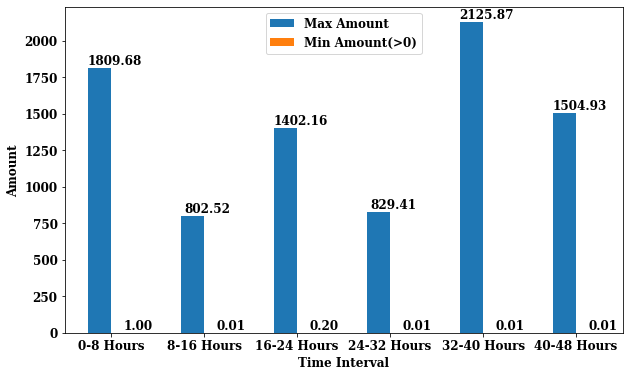

In [169]:
# Max - Min Fraudulent Transactions Amount grouped by the 'Time_Interval' column
order=['0-8 Hours','8-16 Hours','16-24 Hours','24-32 Hours','32-40 Hours','40-48 Hours']
ax = maxmin.set_index(maxmin.index).loc[order].plot(kind="bar",figsize=(10,6), legend=True)
ax.set_ylabel('Amount',fontweight='bold')
ax.set_xlabel('Time Interval',fontweight='bold')
plt.xticks(rotation=0)
ax.legend(loc='upper center',fontsize=12)
for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha = 'center', va = 'center',  xytext = (15,7), textcoords = 'offset points')

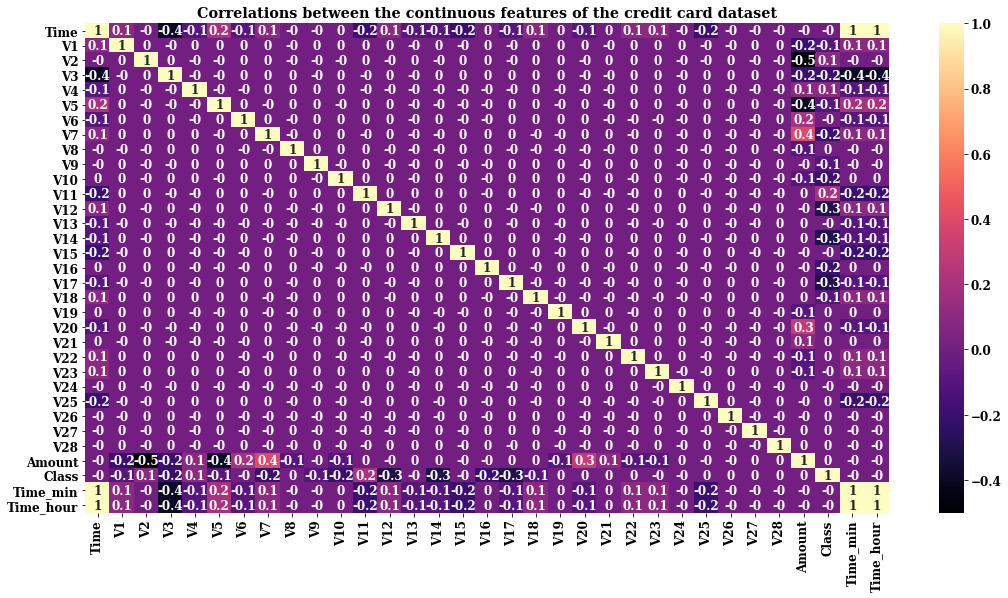

In [170]:
# Correlations betweeen the dataset features 
plt.figure(figsize=(18,9))
plt.title('Correlations between the continuous features of the credit card dataset',fontweight='bold')
sns.heatmap(data.corr().round(1),annot=True,cmap='magma');



In [171]:
# Correlation of dataset features with the 'Amount' feature for fraudulent transactions
data[data['Class']==1].corr(method='pearson')['Amount'].sort_values(ascending=False)

Amount       1.000000
V6           0.228130
V7           0.201334
V14          0.184339
V9           0.132235
V15          0.128622
V12          0.128272
V10          0.102922
V27          0.095961
V19          0.093466
V3           0.089994
V24          0.083108
V16          0.049271
Time_hour    0.048732
Time_min     0.048732
Time         0.048732
V1           0.048216
V20          0.045428
V8           0.036081
V17          0.033149
V18          0.024395
V13          0.020538
V22          0.004552
V21         -0.000834
V5          -0.052031
V26         -0.077508
V28         -0.118918
V25         -0.128156
V4          -0.133795
V11         -0.135048
V23         -0.166725
V2          -0.272762
Class             NaN
Name: Amount, dtype: float64

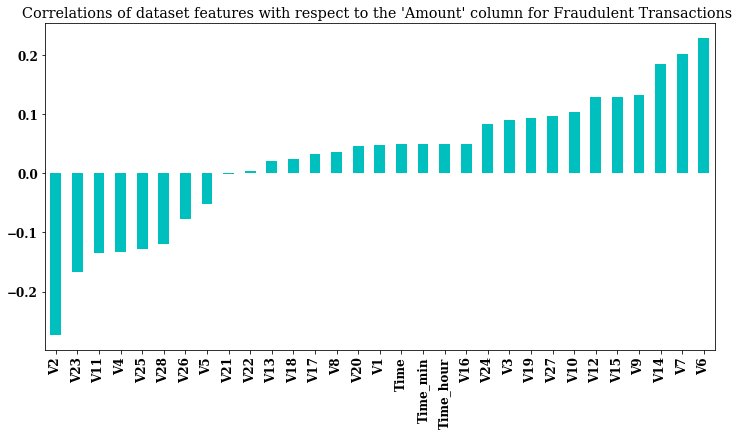

In [172]:
# Correlation plot of the dataset features with the 'Amount' column for Fraudulent Transactions
plt.figure(figsize=(12,6))
plt.rcParams['font.size']=12
data[data['Class']==1].corr(method='pearson')['Amount'].sort_values().drop(['Amount','Class']).plot(kind='bar',color='c')
plt.title("Correlations of dataset features with respect to the 'Amount' column for Fraudulent Transactions ");

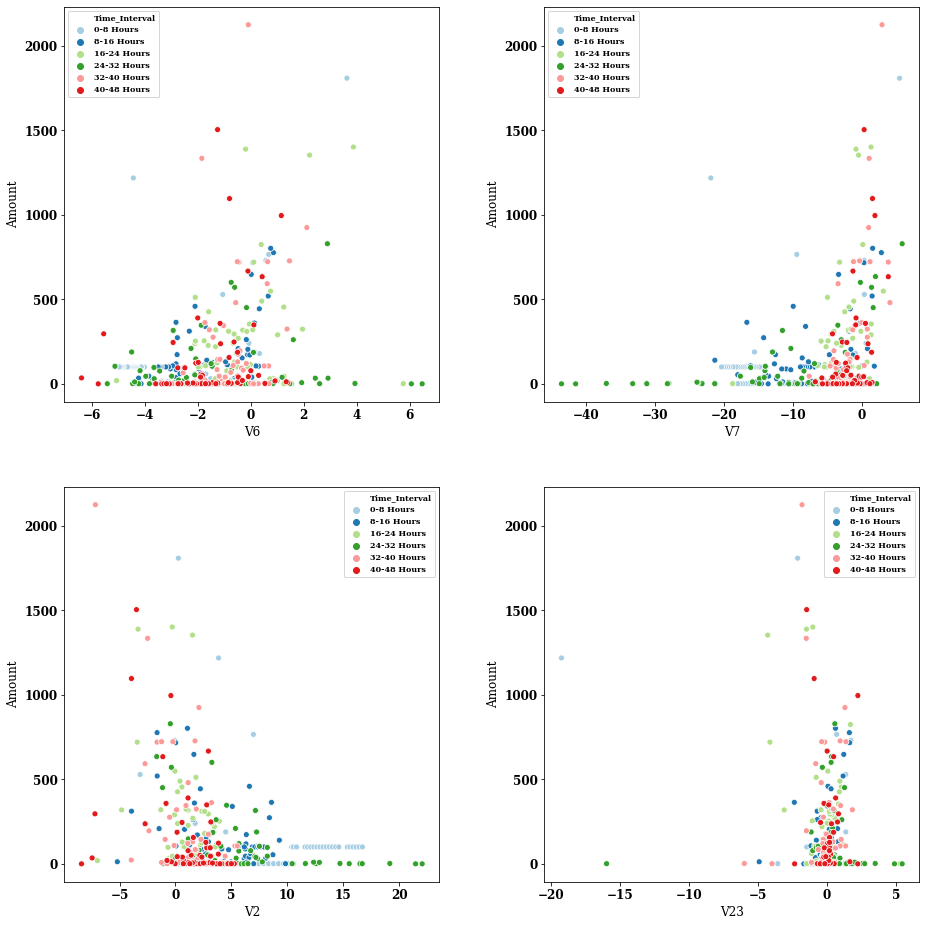

In [173]:
# Scatterplots, presenting the relationships between the 'Amount' (fraudulent transactions) and its a) two strongest, b) two weakest correlated
# dataset features for different time intevals

fig,axs=plt.subplots(2,2,figsize=(14,14))
plt.rcParams["font.weight"] = "bold"
plt.rcParams['font.size']=12
sns.scatterplot(x='V6',y='Amount',data=data[data['Class']==1],palette='Paired',hue='Time_Interval',ax=axs[0,0])

sns.scatterplot(x='V7',y='Amount',data=data[data['Class']==1],palette='Paired',hue='Time_Interval',ax=axs[0,1])

sns.scatterplot(x='V2',y='Amount',data=data[data['Class']==1],palette='Paired',hue='Time_Interval',ax=axs[1,0])

sns.scatterplot(x='V23',y='Amount',data=data[data['Class']==1],palette='Paired',hue='Time_Interval',ax=axs[1,1])

for ax in axs.flat:
    ax.legend(loc='best',fontsize=8)
    ax.figure.tight_layout(pad=4)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


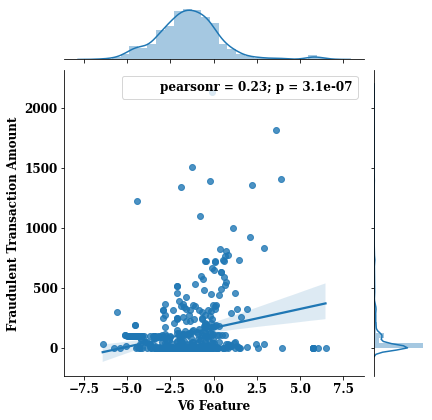

In [174]:
# Jointplot presenting the data distribution (spread of data) of the strongest correlated dataset feature with respect to  
# fraudulent transaction amount and the 'Amount' feature 

import scipy.stats as stats

jointp=sns.jointplot(x=data['V6'][data['Class']==1], y=data['Amount'][data['Class']==1],height=6, kind='reg')
plt.xlabel('V6 Feature',fontweight='bold')
plt.ylabel('Fraudulent Transaction Amount',fontweight='bold')
jointp.annotate(stats.pearsonr)
plt.show()

In [175]:
# Sampling is applied to reduce the time that is required to perform the upcoming computational processes due to the large size of the original dataset

dataset=data.sample(frac=0.3,random_state=0)
dataset.shape


(85442, 34)

In [176]:
# Ratio of fraudulent to nonfraudulent transactions
nonfraudulent=dataset[dataset['Class']==0]
fraudulent=dataset[dataset['Class']==1]
print(len(nonfraudulent),',' ,len(fraudulent))
fraud_ratio=len(fraudulent)/float(len(nonfraudulent))
print(fraud_ratio)

85295 , 147
0.0017234304472712352


In [177]:
# Defining the samples X by dropping the 'Class' (since they are the labels y)feature and all time related data columns
X=dataset.drop(['Class','Time','Time_min','Time_hour','Time_Interval'],axis=1).values
y=dataset['Class'].values
print(X.shape,y.shape)



(85442, 29) (85442,)


In [178]:
# Use of the Local Outlier Factor (LOF) to detect the fraudulent transactions, where locality is determined by the k-nearest neighbors algorithm
from sklearn.neighbors import LocalOutlierFactor

# Creating the classifier. In terms of the number of neighbors, there is no specific method/approach to determine their number. A general rule, that has been
# used in this example, is to choose as total number of neighbors the squared root of the total number of training samples( in this case,equals to ~ 293)
classifier = LocalOutlierFactor(n_neighbors=293, contamination=fraud_ratio)
# fit_predict to fit the data and to predict whether a sample is outlier or not
y_pred_lof = classifier.fit_predict(X)
# Score: Values close to 1 -> Inlier, whereas Values close to -1 -> Outlier
score = classifier.negative_outlier_factor_
# Since the dataset labels y are in the form of 0 and 1(nonfraudulent,fraudulent), the predicted values are converted from -1 & 1 to 1 & 0 respectively
y_pred_lof[y_pred_lof==1]=0
y_pred_lof[y_pred_lof==-1]=1




In [179]:
# LOF model predictions
y_prediction_lof=pd.DataFrame(data=y_pred_lof)
y_prediction_lof.columns=['Pred']
print('Num. of Inliers[0] & Outliers[1]: ')
print(y_prediction_lof['Pred'].value_counts())
# Total number of prediction errors
total_prediction_errors = (y_pred_lof != y).sum()
print('\r')
print('Total Prediction Errors: ',total_prediction_errors)

Num. of Inliers[0] & Outliers[1]: 
0    85294
1      148
Name: Pred, dtype: int64

Total Prediction Errors:  169


In [180]:
# Classification report for model performance evaluation. The fact that the dataset is unbalanced, with respect to the nonfraudulent(~99,83%) &  
# fraudulent(0.17%) entries, has affected the predictive performance of the LOF algorithm. In particular, the model failed to predict the outliers with a
# high percentage of accuracy as its precision and recall scores are 0.43. On the other hand, considering the unbalanced entries, this score is satisfactory
# (as it has managed to detect approximately one out of two outliers )

from sklearn.metrics import classification_report
print(classification_report(y,y_pred_lof))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.43      0.43      0.43       147

    accuracy                           1.00     85442
   macro avg       0.71      0.71      0.71     85442
weighted avg       1.00      1.00      1.00     85442



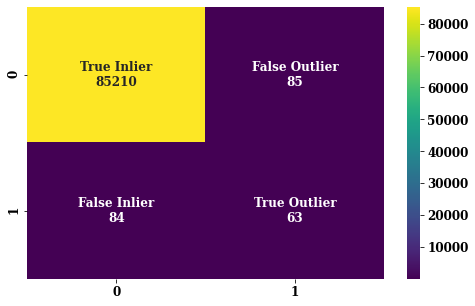

In [181]:
# Confusion Matrix in the form of 'True Inlier','False Outlier','False Inlier','True Outlier'
from sklearn.metrics import confusion_matrix
conf_m=confusion_matrix(y,y_pred_lof)
#group_names = ['True Pos','False Neg','False Pos','True Neg']
group_names = ['True Inlier','False Outlier','False Inlier','True Outlier']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_m.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(8,5))
sns.heatmap(conf_m, annot=labels, fmt='', cmap='viridis');

In [189]:
# Use of the Isolation Forest algorithm to detect the fraudulent transactions
from sklearn.ensemble import IsolationForest
# Creating the classifier.In terms of the total trees number(n_estimators), the general rule is the higher the better. On the other hand, after a specific
# value, there is no significant improvement on the fitting process and it is also computationally expensive. In this case, the selected value has been 300
# due to the large size of the training set
class_ifor = IsolationForest( n_estimators=300,max_samples=len(X), contamination=fraud_ratio,random_state=0)
#Fitting the model to the data samples.
class_ifor.fit(X)
# decision function to get the average outlier score (from base classifiers) of X 
score = class_ifor.decision_function(X)
y_pred_ifor=class_ifor.predict(X)
y_pred_ifor[y_pred_ifor == 1]=0
y_pred_ifor[y_pred_ifor == -1]=1


In [193]:
# Isolation Forest model predictions 
y_prediction_ifor=pd.DataFrame(data=y_pred_ifor)
y_prediction_ifor.columns=['Pred']
print('Num. of Inliers[0] & Outliers[1]: ')
print(y_prediction_ifor['Pred'].value_counts())
# Total number of prediction errors
total_prediction_errors = (y_pred_ifor != y).sum()
print('\r')
print('Total Prediction Errors: ',total_prediction_errors)

Num. of Inliers[0] & Outliers[1]: 
0    85294
1      148
Name: Pred, dtype: int64

Total Prediction Errors:  203


In [196]:
# Classification report for model performance evaluation. Similar to the LOF fitting, the unbalanced dataset had a negative impact on the accuracy of the
# Isolation Forest algorithm. As it can be observed, LOF has slightly outperformed IFor algorithm with respect to the outlier 'precision' and 'recall' 
# scores & prediction errors(LOF:169, Ifor:203 pred_errors). This is due to the k_neighbors value=293, which is significatly higher than the sklearn 
# default value of 20, and that resulted in a more efficient training process (though more computationally expensive). For the default value of 20 neighbors, 
# the 'precision' and 'recall' scores of the LOF model were very low (~ 0.12).
print(classification_report(y,y_pred_ifor))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.31      0.31      0.31       147

    accuracy                           1.00     85442
   macro avg       0.65      0.66      0.66     85442
weighted avg       1.00      1.00      1.00     85442



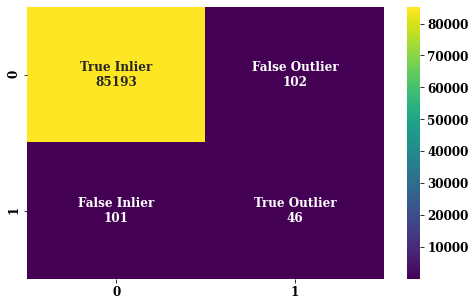

In [195]:
# Confusion Matrix in the form of 'True Inlier','False Outlier','False Inlier','True Outlier'

conf_m=confusion_matrix(y,y_pred_ifor)
#group_names = ['True Pos','False Neg','False Pos','True Neg']
group_names = ['True Inlier','False Outlier','False Inlier','True Outlier']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_m.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(8,5))
sns.heatmap(conf_m, annot=labels, fmt='', cmap='viridis');